We are going to explore some weather data. We have the monthly average temperature for Dulles VA, Olympia WA, and Miama FL in csv files. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I've loaded the Dulles data using numpy's loadtxt method, see the documentation for more info. I've also set up a variable holding the months of the year (you'll need this later).

In [2]:
months = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dulles = loadtxt('dulles.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11,12], delimiter=',')

1) Please load the data for Miami and Olympia into variables called miami and olympia. The files are named 'miami.csv' and 'olympia.csv'

In [3]:
# 1. Write your code here to load data for Miami and Olympia
miami = loadtxt('miami.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11,12], delimiter=',')

olympia = loadtxt('olympia.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11,12], delimiter=',')

2) The temperatures are in Fahrenheit now. Convert the temperatures to Celsius.

**Bonus** write a function to convert to Celsius

In [4]:
# 2. Convert the temperatures for all three cities from Fahrenheit to Celsius here. Do not use a loop.
dullesC = (dulles - 32) * (5.0/9)
miamiC = (miami - 32) * (5.0/9)
olympiaC = (olympia - 32) * (5.0/9)

def convertToC(city):
    return (city - 32) * (5.0/9.0)

3) Find the mean and standard deviation of the temperature for each month using the data that is in Celsius in all cities. Check the documentation for numpy mean to see how to calculate the mean for each column.

In [5]:
# 3. Mean and Stdev
dullesMean = mean(dullesC, 0)
dullesStd = std(dullesC, 0)
miamiMean = mean(miamiC, 0)
miamiStd = std(miamiC, 0)
olympiaMean = mean(olympiaC, 0)
olympiaStd = std(olympiaC, 0)


4) Now plot the means per month in a line graph. All cities should be on the same plot. Use green for Dulles, orange for Miami, and grey for Olympia. Plot the standard deviations as error bars for the line graph. See the error bar demo for matplotlib here http://matplotlib.org/examples/statistics/errorbar_demo_features.html

Make sure that your x labels are months and not just numbers.

([<matplotlib.axis.XTick at 0x105fd3f50>,
 <a list of 12 Text xticklabel objects>)

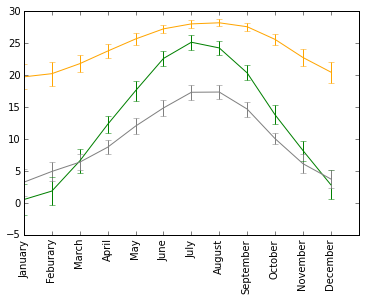

In [6]:
# Plot the meanse and stdev's here
fig, ax1 = plt.subplots(1, 1)
ax1.errorbar(np.arange(0,12), dullesMean, yerr=dullesStd, color='green')
ax1.errorbar(np.arange(0,12), miamiMean, yerr=miamiStd, color='orange')
ax1.errorbar(np.arange(0,12), olympiaMean, yerr=olympiaStd, color='grey')
plt.xticks(np.arange(0,12), months, rotation='vertical')

5) Create a figure with 3 subplots. Please create a boxplot showing the temperature range (use the data from #2, not from #3) for each month one subplot per city. See the matplotlib documentation for boxplots to help create your plots. Please highlight the means (boxplot has an easy option for this) http://matplotlib.org/examples/statistics/boxplot_demo.html

Make sure that your x labels are months and not just numbers.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

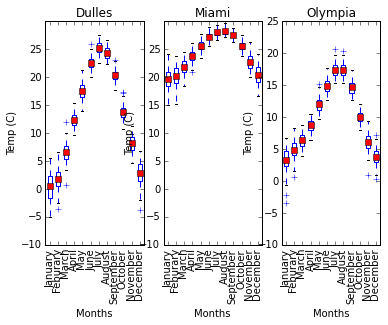

In [7]:
#Create your plots here
#First, create an empty figure with 1 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Add title and labels
ax1.set_title('Dulles')
ax1.set_xlabel('Months')
ax1.set_ylabel('Temp (C)')

ax2.set_title('Miami')
ax2.set_xlabel('Months')
ax2.set_ylabel('Temp (C)')

ax3.set_title('Olympia')
ax3.set_xlabel('Months')
ax3.set_ylabel('Temp (C)')

# Add the boxes
plt.xticks(rotation=90)
ax1.boxplot(dullesC, showmeans=True) 
ax2.boxplot(miamiC, showmeans=True)
ax3.boxplot(olympiaC, showmeans=True)

plt.setp([ax1, ax2, ax3], xticks=arange(1,13), xticklabels=months, 
        yticks=arange(-10,30,5))
plt.sca(ax1)
plt.xticks(rotation=90)
plt.sca(ax2)
plt.xticks(rotation=90)
plt.sca(ax3)
plt.xticks(rotation=90)

6) \*\*\* More difficult
I only want to visit a city when it's weather is nice. I define nice weather as a 95% (2 sigma) probability that the temperature will be between 55-75F. Hint: use logical arrays. 
What months should I plan my vacations to Miami, Olympia, and Dulles?

Write a function that takes a city's weather data, and a tuple with (min, max) temps and returns the list of months to visit that city. If there are no months that they should visit, your function should return an empty array.

In [8]:
#Write your function here
def whenShouldIVisit(cityData, tempTuple):
    monthList = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    cityMean = mean(cityData, 0)
    cityStd = std(cityData, 0)
    months = where(logical_and((cityMean - (2 * cityStd)) > tempTuple[0],(cityMean + (2 * cityStd)) < tempTuple[1]))
    months = months[0]
    return [monthList[m] for m in months ]
    
#Run your function for all three cities
print "I should visit Dulles in ", whenShouldIVisit(dulles, (55,75))
print "I should visit Miami in ", whenShouldIVisit(miami, (55,75))
print "I should visit Olympia in ", whenShouldIVisit(olympia, (55,75))

I should visit Dulles in  ['May', 'September']
I should visit Miami in  ['January', 'December']
I should visit Olympia in  ['July', 'August']
